<h2>PAGERANK ALGORITHM<h2/> 

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [29]:
N= 5     #Number of Nodes or web pages
q= 0.85     # Damping factor (coefficient de calibrage) 

In [30]:
G= nx.gnp_random_graph(N,0.6,seed=None, directed=True) # generate random directed graph

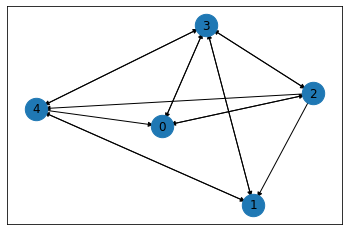

In [31]:
# visualize graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(),edge_color='black')
nx.draw_networkx_labels(G, pos)
plt.show()

In [32]:
A = nx.to_numpy_matrix(G) #Convert Graph to Adjacency matrix
print(A)
#Lines contains where the node is pointing
#Row contains the nodes that are pointing the the n node

[[0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]


In [33]:
#Simplified transition matrix Function
def STMF(x):
    return x/x.sum(axis=1)

In [34]:
STM = STMF(A)
print(STM)

[[0.         0.         0.5        0.5        0.        ]
 [0.         0.         0.         0.5        0.5       ]
 [0.25       0.25       0.         0.25       0.25      ]
 [0.25       0.25       0.25       0.         0.25      ]
 [0.33333333 0.33333333 0.         0.33333333 0.        ]]


In [35]:
#Non-Simplified transition matrix Function
def NSTMF(x):
    A = STMF(x)
    AT = A*q+((1-q)/N)
    return AT

In [36]:
NSTM = NSTMF(A)
print(NSTM)

[[0.03       0.03       0.455      0.455      0.03      ]
 [0.03       0.03       0.03       0.455      0.455     ]
 [0.2425     0.2425     0.03       0.2425     0.2425    ]
 [0.2425     0.2425     0.2425     0.03       0.2425    ]
 [0.31333333 0.31333333 0.03       0.31333333 0.03      ]]


In [41]:
#Simplified PageRank Vector
PRSTM =np.sum(STM,axis=0)  
print(PRSTM)

[[0.83333333 0.83333333 0.75       1.58333333 1.        ]]


In [42]:
#Non-Simplified PageRank Vector
PRNSTM =np.sum(NSTM,axis=0)  
print(PRNSTM)

[[0.85833333 0.85833333 0.7875     1.49583333 1.        ]]
